In [1]:
import pandas as pd
import numpy as np
#df_udemy_courses = pd.read_csv(r'udemy_coursesEDA.csv')
df_coursera_courses = pd.read_csv(r'C:\Users\USER\Documents\Henry\Proyecto Individual Moocs\Moocs\Coursera_courses.csv')
df_coursera_reviews = pd.read_csv(r'C:\Users\USER\Documents\Henry\Proyecto Individual Moocs\Moocs\Coursera_reviews.csv')

In [2]:
df_coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [3]:
len(df_coursera_courses['institution'])

623

In [4]:
len(df_coursera_courses['institution'].unique())

134

In [5]:
len(df_coursera_courses['course_id'])

623

In [6]:
len(df_coursera_courses['course_id'].unique())

623

In [7]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [8]:
len(df_coursera_reviews['course_id'])


1454711

In [9]:
len(df_coursera_reviews['course_id'].unique())

604

In [10]:
import pandas as pd

# Obtener los valores únicos de la columna 'course_id'
unique_course_ids = df_coursera_reviews['course_id'].unique()

data = {
    'course_id': [],
    'average': [],
    'n_reviews': []  # Nueva columna para contar la cantidad de evaluaciones
}

# Iterar sobre los valores únicos de 'course_id' y calcular el promedio de calificaciones y contar las evaluaciones para cada curso
for course_id in unique_course_ids:
    filtered_reviews = df_coursera_reviews.loc[df_coursera_reviews['course_id'] == course_id]
    average_rating = filtered_reviews['rating'].mean()
    count_reviews = filtered_reviews.shape[0]  # Contar la cantidad de evaluaciones
    
    data['course_id'].append(course_id)
    data['average'].append(average_rating)
    data['n_reviews'].append(count_reviews)

# Crear el DataFrame a partir de los datos recopilados
df_data = pd.DataFrame(data)


In [11]:
df_data.head()

,course_id,average,n_reviews
0,google-cbrs-cpi-training,4.931034,87
1,financial-markets-global,4.819466,8918
2,introduction-psychology,4.840494,8426
3,python,4.581782,45218
4,computer-networking,4.645245,14176


In [12]:
len(df_data['course_id'])

604

In [13]:
len(df_data['course_id'].unique())

604

In [14]:
merge_df = pd.merge(df_coursera_courses, df_data, on='course_id', how='inner')

In [17]:
merge_df.head()

,name,institution,course_url,course_id,average,n_reviews
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.750522,35895
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.813614,3702
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.928404,20085
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.776183,35319
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.931034,87


In [18]:
del merge_df['course_url']

In [19]:
merge_df.loc[merge_df['average'] >= 5, 'average'] = 5

In [20]:
merge_df.name=merge_df.name.astype('category')
merge_df.institution=merge_df.institution.astype('category')
merge_df.course_id=merge_df.course_id.astype('category')
merge_df.average=merge_df.average.astype('float')
merge_df.n_reviews=merge_df.n_reviews.astype('int')


In [21]:
merge_df.head()

,name,institution,course_id,average,n_reviews
0,Machine Learning,Stanford University,machine-learning,4.750522,35895
1,Indigenous Canada,University of Alberta,indigenous-canada,4.813614,3702
2,The Science of Well-Being,Yale University,the-science-of-well-being,4.928404,20085
3,Technical Support Fundamentals,Google,technical-support-fundamentals,4.776183,35319
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training,4.931034,87


In [23]:
merge_df.average.astype('float')

0      4.750522
1      4.813614
2      4.928404
3      4.776183
4      4.931034
         ...   
599    4.911824
600    4.579470
601    3.500000
602    4.646840
603    4.783088
Name: average, Length: 604, dtype: float64

In [24]:
merge_df.head()

,name,institution,course_id,average,n_reviews
0,Machine Learning,Stanford University,machine-learning,4.750522,35895
1,Indigenous Canada,University of Alberta,indigenous-canada,4.813614,3702
2,The Science of Well-Being,Yale University,the-science-of-well-being,4.928404,20085
3,Technical Support Fundamentals,Google,technical-support-fundamentals,4.776183,35319
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training,4.931034,87


In [25]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         604 non-null    category
 1   institution  604 non-null    category
 2   course_id    604 non-null    category
 3   average      604 non-null    float64 
 4   n_reviews    604 non-null    int32   
dtypes: category(3), float64(1), int32(1)
memory usage: 57.6 KB


In [26]:
merge_df.describe()

,average,n_reviews
count,604.000000,604.000000
mean,4.630791,2408.461921
std,0.398287,4599.422887
min,1.000000,3.000000
25%,4.573393,374.250000
50%,4.726540,1071.500000
75%,4.824158,2408.250000
max,5.000000,45218.000000


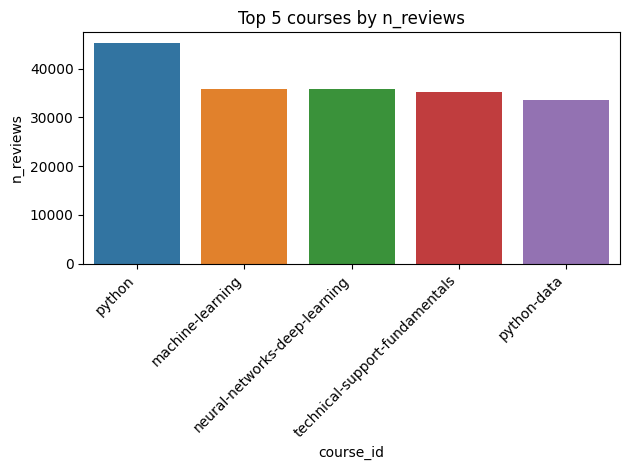

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los cinco primeros course_id con el mayor número de reviews
top_course_ids = merge_df.nlargest(5, 'n_reviews')['course_id'].tolist()

# Filtrar el DataFrame para incluir solo los cinco primeros course_id
df_top_courses = merge_df[merge_df['course_id'].isin(top_course_ids)]

# Ordenar el DataFrame por la columna 'n_reviews' de mayor a menor
df_top_courses = df_top_courses.sort_values('n_reviews', ascending=False)

# Graficar la distribución de las n_reviews para los cinco primeros course_id
sns.barplot(x='course_id', y='n_reviews', data=df_top_courses, order=top_course_ids)
plt.xlabel('course_id')
plt.ylabel('n_reviews')
plt.title('Top 5 courses by n_reviews')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


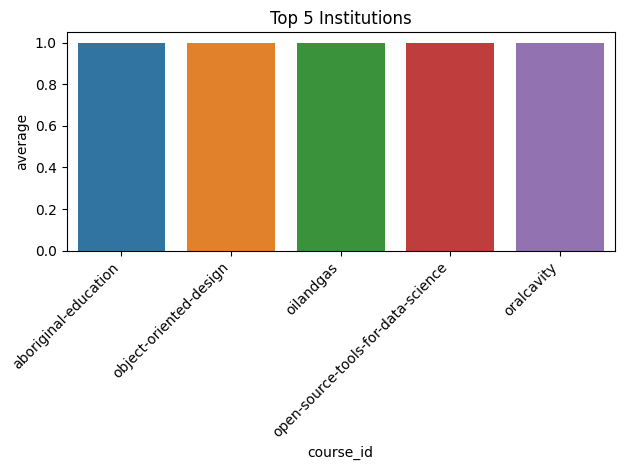

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las 5 principales instituciones
top_institutions = merge_df['course_id'].value_counts().head(5).index

# Filtrar el DataFrame para incluir solo las 5 principales instituciones
df_top_institutions = merge_df[merge_df['course_id'].isin(top_institutions)]

# Graficar la distribución de las instituciones principales
sns.countplot(x='course_id', data=df_top_institutions, order=top_institutions)
plt.xlabel('course_id')
plt.ylabel('average')
plt.title('Top 5 Institutions')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


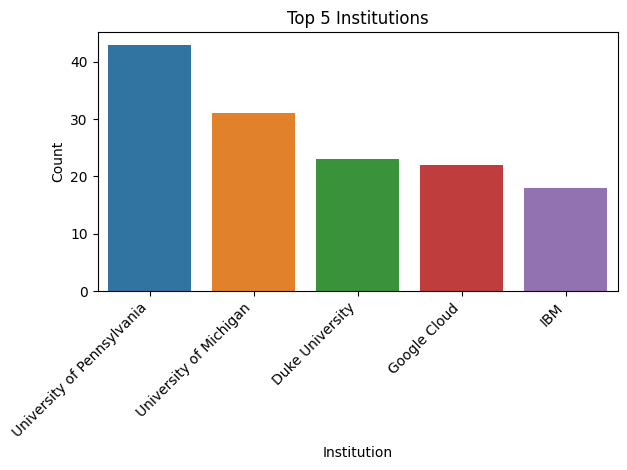

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las 5 principales instituciones
top_institutions = merge_df['institution'].value_counts().head(5).index

# Filtrar el DataFrame para incluir solo las 5 principales instituciones
df_top_institutions = merge_df[merge_df['institution'].isin(top_institutions)]

# Graficar la distribución de las instituciones principales
sns.countplot(x='institution', data=df_top_institutions, order=top_institutions)
plt.xlabel('Institution')
plt.ylabel('Count')
plt.title('Top 5 Institutions')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Este histograma permite visualizar la frecuencia de calificaciòn promedio de los diferentes cursos 

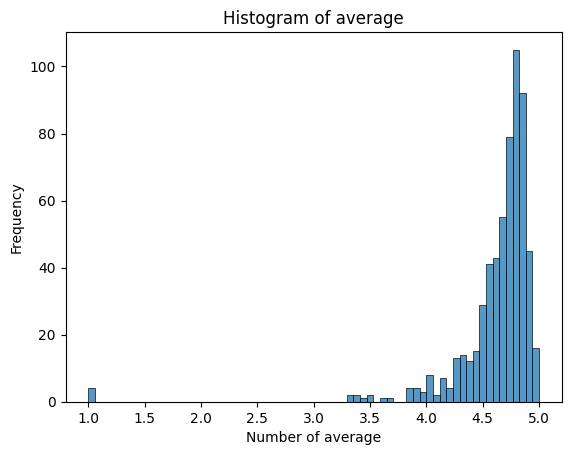

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Graficar el histograma de 'average'
sns.histplot(data=merge_df, x='average')

# Configurar etiquetas y título del gráfico
plt.xlabel('Number of average')
plt.ylabel('Frequency')
plt.title('Histogram of average')
plt.show()

Este histograma permite visualizar la frecuencia de revisiones de cursos

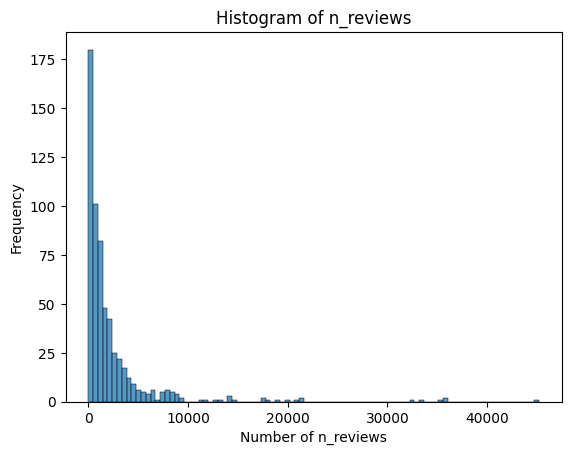

In [25]:
# Graficar el histograma de 'n_enrolled'
sns.histplot(data=merge_df, x='n_reviews')

# Configurar etiquetas y título del gráfico
plt.xlabel('Number of n_reviews')
plt.ylabel('Frequency')
plt.title('Histogram of n_reviews')
plt.show()